In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev

In [2]:
comment_answers = pd.read_csv('data/evaluation_data/comment_answer_data.csv')
viewpoint_answers  = pd.read_csv('data/evaluation_data/point_of_view_answer_data.csv')
question_data = pd.read_csv('data/evaluation_data/question_data.csv')
comment_recommendation = pd.read_csv('data/evaluation_data/comment_data.csv')
participants = pd.read_csv('data/evaluation_data/participant_data.csv')

# Overview Question data

In [3]:
question_data

,Unnamed: 0,question_id,user_comment,article_title,keywords,news_agency
0,0,1,"This is a funny column. But seriously folks, ...","And Now, the Dreaded Trump Curse","[United States Politics and Government, Trump ...",NyTimes
1,1,2,Abortion is a safe medical procedure and has n...,"To Save Abortion Rights, We Have to Think Beyo...","[Abortion, Birth Control and Family Planning, ...",NyTimes
2,2,3,You do not have to go this far across the to s...,"Come to This Island, Before It Disappears","[Greenhouse Gas Emissions, Global Warming, Agr...",NyTimes
3,3,4,Trump had never been considered a racist until...,Nikki Haley Cancels Iowa Event: Video Shows Em...,"[Donald Trump,globalism,Globalists,Iowa,Nikki ...",Breitbart
4,4,5,The difference is that all the unborn are inno...,Florida Abortion Ballot Initiative Reaches Sig...,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",Breitbart
5,5,6,"Man made climate change is a myth, which is pr...",Woke Lancet: Climate Change ‘the Biggest Globa...,"[climate alarmism,Climate Change,Global Warmin...",Breitbart


In [4]:
question_data[question_data["question_id"].isin([1,2,3])][["question_id", "news_agency"]]

,question_id,news_agency
0,1,NyTimes
1,2,NyTimes
2,3,NyTimes


# Check if some participants did not answer all questions for assessment of single recommendations

In [5]:
comment_answers

,Unnamed: 0,answer_id,participant_id,question_id,news_agency,keywords,comment_selection_id,comment_text,recommendation_method,comment_id,good_recommendation
0,0,1,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,"In your case yes, post partum. Like soon.",random,62,False
1,1,2,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,It died the minute Trump became the leader of ...,random,61,False
2,2,3,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",25,This decision is absolutely staggering in it's...,news-agency,75,True
3,3,4,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",25,The very opposite is true. Abortion is a moral...,news-agency,74,True
4,4,5,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,"Yes, it appears to be ""losing"" as more and mor...",random,63,True
...,...,...,...,...,...,...,...,...,...,...,...
493,493,494,6,3,NyTimes,"[Greenhouse Gas Emissions, Global Warming, Agr...",11,"All of the countries, the leadership class, ha...",random,32,True
494,494,495,6,3,NyTimes,"[Greenhouse Gas Emissions, Global Warming, Agr...",11,"Ironically, many northern lands, where ghg are...",random,31,False
495,495,496,6,3,NyTimes,"[Greenhouse Gas Emissions, Global Warming, Agr...",14,"Yes, human beings are extremely adept at ignor...",emotion,40,True
496,496,497,6,3,NyTimes,"[Greenhouse Gas Emissions, Global Warming, Agr...",14,I am not surprised to find climate change at t...,emotion,41,False


In [6]:
# Find participants who did not finish the evaluation
comment_answers.groupby('participant_id').count()

,Unnamed: 0,answer_id,question_id,news_agency,keywords,comment_selection_id,comment_text,recommendation_method,comment_id,good_recommendation
participant_id,,,,,,,,,,
1,54,54,54,54,54,54,54,54,54,54
2,54,54,54,54,54,54,54,54,54,54
3,54,54,54,54,54,54,54,54,54,54
4,54,54,54,54,54,54,54,54,54,54
6,12,12,12,12,12,12,12,12,12,12
7,54,54,54,54,54,54,54,54,54,54
8,54,54,54,54,54,54,54,54,54,54
9,54,54,54,54,54,54,54,54,54,54
10,54,54,54,54,54,54,54,54,54,54


In [7]:
participant_ids_not_finished = [56]

In [8]:
# Exclude participant 6 who has only 12 answers. All other participants have 54. Participant 5 did not answer a single question 
comment_answers = comment_answers[~comment_answers.participant_id.isin(participant_ids_not_finished)]

In [9]:
# Check if only participants with 54 answers are present
# 6 user comments * (3 model comments (stance, sentiment, emotion) + 3 model comments (news agency based) + 3 random selected comments) = 54 expected comment answers
comment_answers.groupby('participant_id').count()

,Unnamed: 0,answer_id,question_id,news_agency,keywords,comment_selection_id,comment_text,recommendation_method,comment_id,good_recommendation
participant_id,,,,,,,,,,
1,54,54,54,54,54,54,54,54,54,54
2,54,54,54,54,54,54,54,54,54,54
3,54,54,54,54,54,54,54,54,54,54
4,54,54,54,54,54,54,54,54,54,54
7,54,54,54,54,54,54,54,54,54,54
8,54,54,54,54,54,54,54,54,54,54
9,54,54,54,54,54,54,54,54,54,54
10,54,54,54,54,54,54,54,54,54,54
12,54,54,54,54,54,54,54,54,54,54


# Check if some participants did not answer all questiosn to assess if model recommendations are more diverse than random recommendation

In [10]:
viewpoint_answers


,Unnamed: 0,question_id,user_comment,keywords,news_agency,recommendation_method,selected_recommendation_method,participant_id
0,0,5,The difference is that all the unborn are inno...,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",Breitbart,news-agency,news-agency,1
1,1,2,Abortion is a safe medical procedure and has n...,"[Abortion, Birth Control and Family Planning, ...",NyTimes,emotion,emotion,1
2,2,3,You do not have to go this far across the to s...,"[Greenhouse Gas Emissions, Global Warming, Agr...",NyTimes,stance,stance,1
3,3,5,The difference is that all the unborn are inno...,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",Breitbart,emotion,emotion,1
4,4,6,"Man made climate change is a myth, which is pr...","[climate alarmism,Climate Change,Global Warmin...",Breitbart,news-agency,news-agency,1
...,...,...,...,...,...,...,...,...
105,105,3,You do not have to go this far across the to s...,"[Greenhouse Gas Emissions, Global Warming, Agr...",NyTimes,news-agency,no_selection,4
106,106,1,"This is a funny column. But seriously folks, ...","[United States Politics and Government, Trump ...",NyTimes,sentiment,no_selection,4
107,107,2,Abortion is a safe medical procedure and has n...,"[Abortion, Birth Control and Family Planning, ...",NyTimes,stance,random,4
108,108,1,"This is a funny column. But seriously folks, ...","[United States Politics and Government, Trump ...",NyTimes,emotion,emotion,6


In [11]:
viewpoint_answers.groupby('participant_id').count()


,Unnamed: 0,question_id,user_comment,keywords,news_agency,recommendation_method,selected_recommendation_method
participant_id,,,,,,,
1,12,12,12,12,12,12,12
2,12,12,12,12,12,12,12
3,12,12,12,12,12,12,12
4,12,12,12,12,12,12,12
6,2,2,2,2,2,2,2
7,12,12,12,12,12,12,12
8,12,12,12,12,12,12,12
9,12,12,12,12,12,12,12
10,12,12,12,12,12,12,12


In [12]:
viewpoint_answers = viewpoint_answers[~viewpoint_answers['participant_id'].isin(participant_ids_not_finished)]


In [13]:
# Participants who finished the user study answered 12 point of view questions
# 6 user comments * (1 set of comments (Stance, Emotion, Sentiment) + 1 set of comments (News Agency) = 12 answers
viewpoint_answers.groupby('participant_id').count()

,Unnamed: 0,question_id,user_comment,keywords,news_agency,recommendation_method,selected_recommendation_method
participant_id,,,,,,,
1,12,12,12,12,12,12,12
2,12,12,12,12,12,12,12
3,12,12,12,12,12,12,12
4,12,12,12,12,12,12,12
7,12,12,12,12,12,12,12
8,12,12,12,12,12,12,12
9,12,12,12,12,12,12,12
10,12,12,12,12,12,12,12
12,12,12,12,12,12,12,12


# Percentages for Quality of Recommendations for Single Comments

In [14]:
def compute_percentage_for_model_comment_answer_per_question(question_id, pd_data_frame):
    return round(len(pd_data_frame[(pd_data_frame['question_id'] == question_id) & (pd_data_frame['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & (pd_data_frame['good_recommendation'] == True)].index) /   len(pd_data_frame[(pd_data_frame['question_id'] == question_id) & (pd_data_frame['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency']))].index), 2) * 100

In [15]:
def compute_percentage_for_random_comment_answer_per_question(question_id, pd_data_frame):
    return round(len(pd_data_frame[(pd_data_frame['question_id'] == question_id) & (~pd_data_frame['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & (pd_data_frame['good_recommendation'] == True)].index) /   len(pd_data_frame[(pd_data_frame['question_id'] == question_id) & (~pd_data_frame['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency']))].index),2) * 100

In [16]:
question_id = [1,2,3,4,5,6]
random_percentages = [compute_percentage_for_random_comment_answer_per_question(1, comment_answers),
                      compute_percentage_for_random_comment_answer_per_question(2, comment_answers),
                      compute_percentage_for_random_comment_answer_per_question(3, comment_answers),
                      compute_percentage_for_random_comment_answer_per_question(4, comment_answers),
                      compute_percentage_for_random_comment_answer_per_question(5, comment_answers),
                      compute_percentage_for_random_comment_answer_per_question(6, comment_answers)]
model_percentages = [compute_percentage_for_model_comment_answer_per_question(1, comment_answers),
                     compute_percentage_for_model_comment_answer_per_question(2, comment_answers),
                     compute_percentage_for_model_comment_answer_per_question(3, comment_answers),
                     compute_percentage_for_model_comment_answer_per_question(4, comment_answers),
                     compute_percentage_for_model_comment_answer_per_question(5, comment_answers),
                     compute_percentage_for_model_comment_answer_per_question(6, comment_answers)]
percentages_comment_answer_per_question = pd.DataFrame({
    "question_id": question_id,
    "model_percentages": model_percentages,
    "random_percentages": random_percentages,}
)

In [17]:
percentages_comment_answer_per_question

,question_id,model_percentages,random_percentages
0,1,54.0,56.0
1,2,67.0,63.0
2,3,87.0,48.0
3,4,57.0,4.0
4,5,72.0,33.0
5,6,85.0,7.0


In [18]:
# 
print(f"Mean Percentage of Percentage Values for Model:  {round(mean(model_percentages),2)} +/- {round(stdev(model_percentages), 2)}")
print(f"Mean Percentage of Percentage Values for Random:  {round(mean(random_percentages),2)} +/- {round(stdev(random_percentages), 2)}")

Mean Percentage of Percentage Values for Model:  70.33 +/- 13.79
Mean Percentage of Percentage Values for Random:  35.17 +/- 25.07


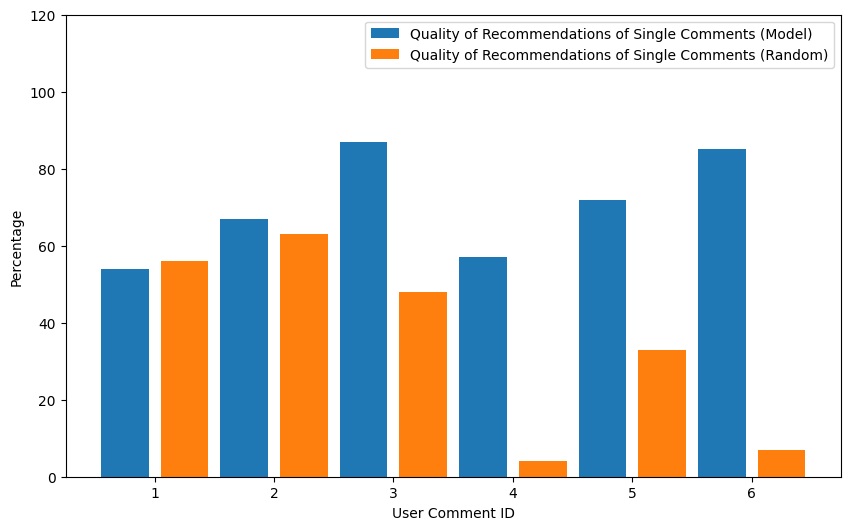

In [19]:
x = percentages_comment_answer_per_question["question_id"].values
y_1 = percentages_comment_answer_per_question["model_percentages"].values
y_2 = percentages_comment_answer_per_question["random_percentages"].values

plt.figure(figsize=(10, 6))

plt.ylim(0, 120)

plt.bar(x - 0.25, y_1, 0.4, label='Quality of Recommendations of Single Comments (Model)')
plt.bar(x + 0.25, y_2, 0.4, label='Quality of Recommendations of Single Comments (Random)')

plt.xlabel('User Comment ID')
plt.ylabel('Percentage')

plt.legend()

plt.savefig('figures/quality_of_recommendations_per_question_model_vs_random.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

# Compute Percentage of model over random regarding diversity

In [20]:
def compute_percentage_point_of_view_comment_answer_for_question(question_id):
    return round(len(viewpoint_answers[(viewpoint_answers['question_id'] == question_id) & (viewpoint_answers['recommendation_method'] == viewpoint_answers['selected_recommendation_method'])].index) / len(viewpoint_answers[(viewpoint_answers['question_id'] == question_id)].index), 2) * 100    

In [21]:
question_ids = [1,2,3,4,5,6]
percentages = []
for question_id in question_ids:
    percentages.append(compute_percentage_point_of_view_comment_answer_for_question(question_id))

In [22]:
percentages

[44.0, 17.0, 89.0, 83.0, 83.0, 89.0]

In [23]:
print(f"Average Percentage for  Preference of Model Over Random Regarding Diversity: {round(mean(percentages),2)} +/- {round(stdev(percentages), 2)} ")

Average Percentage for  Preference of Model Over Random Regarding Diversity: 67.5 +/- 30.02 


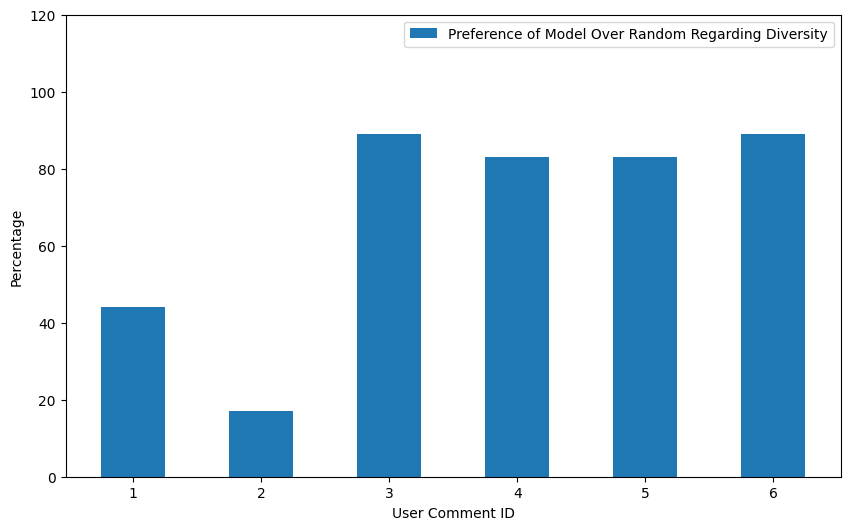

In [24]:
plt.figure(figsize=(10, 6))

plt.ylim(0, 120)
plt.bar(question_ids, percentages, 0.5, label='Preference of Model Over Random Regarding Diversity')
plt.xlabel('User Comment ID')
plt.ylabel('Percentage')
plt.legend()
plt.savefig('figures/preference_of_model_over_random_regarding_diversity_per_question.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

# Compute percentage of quality of recommendations for single comments and preference of model over random regarding diversity, separated by topic

In [25]:
def compute_percentage_for_model_comment_answer_for_question_per_topic(topic):
    return round(len(comment_answers[
                         (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) & 
                         (comment_answers['keywords'].str.contains(topic, case=False))].index) /   len(comment_answers[ 
                                                                                                                       (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                                                                                                                       (comment_answers['keywords'].str.contains(topic, case=False))].index), 2) * 100

In [26]:
def compute_percentage_for_random_comment_answer_for_question_per_topic(topic):
    return round(len(comment_answers[
                         (~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) & 
                         (comment_answers['keywords'].str.contains(topic, case=False))].index) /   len(comment_answers[ 
                                                                                                                       (~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                                                                                                                       (comment_answers['keywords'].str.contains(topic, case=False))].index), 2) * 100

In [27]:
model_topic_percentages = {}
for topic in ["abortion", "trump", "global warming"]:
    model_topic_percentages[topic] = compute_percentage_for_model_comment_answer_for_question_per_topic(topic)


In [28]:
model_topic_percentages

{'abortion': 69.0, 'trump': 56.00000000000001, 'global warming': 86.0}

In [29]:
random_topic_percentages = {}
for topic in ["abortion", "trump", "global warming"]:
    random_topic_percentages[topic] = compute_percentage_for_random_comment_answer_for_question_per_topic(topic)

In [30]:
random_topic_percentages

{'abortion': 48.0, 'trump': 30.0, 'global warming': 28.000000000000004}

In [31]:
def compute_percentage_point_of_view_answer_for_question(topic):
    return round(len(viewpoint_answers[(viewpoint_answers['keywords'].str.contains(topic, case=False) &
                   (viewpoint_answers['recommendation_method'] == viewpoint_answers['selected_recommendation_method']))].index) / len(
        viewpoint_answers[(viewpoint_answers['keywords'].str.contains("abortion", case=False))].index), 2) * 100    

In [32]:
viewpoint_answers_per_topic = {}
for topic in ["abortion", "trump", "global warming"]:
    viewpoint_answers_per_topic[topic] = compute_percentage_point_of_view_answer_for_question(topic)

In [33]:
viewpoint_answers_per_topic

{'abortion': 50.0, 'trump': 64.0, 'global warming': 89.0}

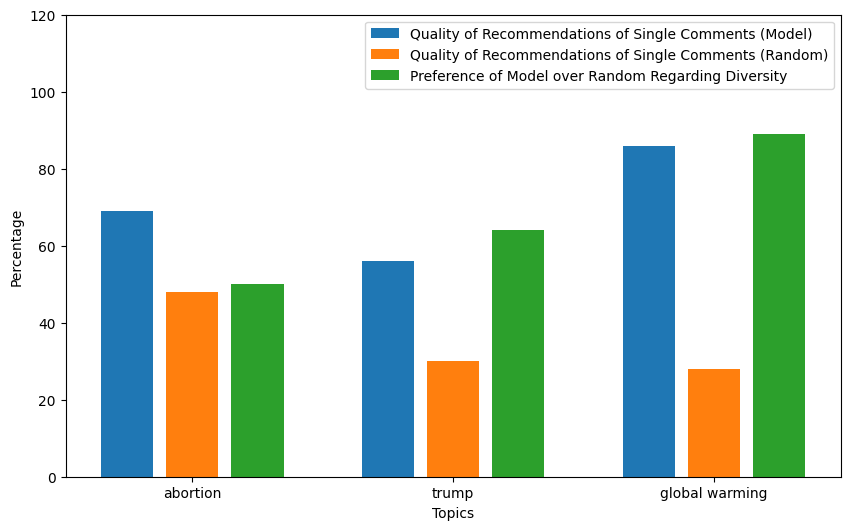

In [34]:
plt.figure(figsize=(10, 6))

plt.ylim(0, 120)

x = ["abortion", "trump", "global warming"]
x_axis = np.arange(len(x))
y_model = [model_topic_percentages["abortion"], model_topic_percentages["trump"], model_topic_percentages["global warming"]]
y_random = [random_topic_percentages["abortion"], random_topic_percentages["trump"], random_topic_percentages["global warming"]]
y_viewpoint = [viewpoint_answers_per_topic["abortion"], viewpoint_answers_per_topic["trump"], viewpoint_answers_per_topic["global warming"]]

plt.bar(x_axis -0.25, y_model, 0.2, label='Quality of Recommendations of Single Comments (Model)')
plt.bar(x_axis, y_random, 0.2, label='Quality of Recommendations of Single Comments (Random)')
plt.bar(x_axis + 0.25, y_viewpoint, 0.2, label='Preference of Model over Random Regarding Diversity')

plt.xticks(x_axis, x)
plt.xlabel("Topics")
plt.ylabel('Percentage')

plt.legend()
plt.savefig('figures/quality_of_recommendations_and_preference_diversity_per_topic.pdf', format='pdf', dpi=500, bbox_inches='tight')

plt.show()

# Compute percentage of quality of recommendations for single comments and preference of model over random regarding diversity, separated by news agency


In [35]:
def compute_percentage_for_model_comment_answer_per_news_agency(news_agency):
    return round(len(comment_answers[
                         (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) & 
                         (comment_answers['news_agency'] == news_agency)].index) /   len(comment_answers[ 
                                                                                                                       (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                                                                                                                       (comment_answers['news_agency'] == news_agency)].index), 2) * 100

In [36]:
def compute_percentage_for_random_comment_answer_per_news_agency(news_agency):
    return round(len(comment_answers[
                         (~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) & 
                         (comment_answers['news_agency'] == news_agency)].index) /   len(comment_answers[ 
                                                                                                                       (~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                                                                                                                       (comment_answers['news_agency'] == news_agency)].index), 2) * 100

In [37]:
def compute_percentage_point_of_view_comment_answer_per_news_agency(news_agency):
    return round(len(viewpoint_answers[(viewpoint_answers['news_agency'] == news_agency) &
                   (viewpoint_answers['recommendation_method'] == viewpoint_answers['selected_recommendation_method'])].index) / len(
        viewpoint_answers[(viewpoint_answers['news_agency'] == news_agency)].index), 2) * 100    

In [38]:
news_agencies = ["Breitbart", "NyTimes"]
model_news_agency_percentages = {}
random_news_agency_percentages = {}
viewpoint_news_agency_percentages = {}
for news_agency in news_agencies:
    model_news_agency_percentages[news_agency]  = compute_percentage_for_model_comment_answer_per_news_agency(news_agency)
    random_news_agency_percentages[news_agency] = compute_percentage_for_random_comment_answer_per_news_agency(news_agency)
    viewpoint_news_agency_percentages[news_agency] = compute_percentage_point_of_view_comment_answer_per_news_agency(news_agency)

In [39]:
model_news_agency_percentages

{'Breitbart': 72.0, 'NyTimes': 69.0}

In [40]:
random_news_agency_percentages

{'Breitbart': 15.0, 'NyTimes': 56.00000000000001}

In [41]:
viewpoint_news_agency_percentages

{'Breitbart': 85.0, 'NyTimes': 50.0}

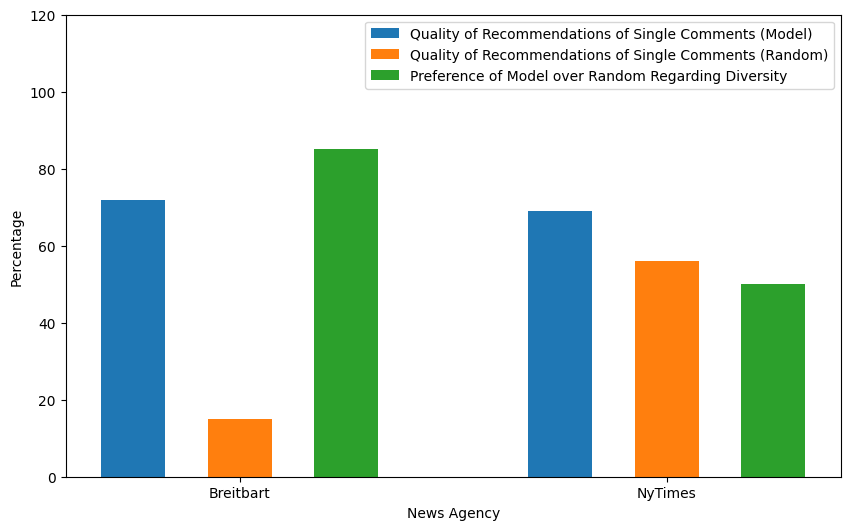

In [42]:
plt.figure(figsize=(10, 6))

plt.ylim(0, 120)

x = ["Breitbart", "NyTimes"]
x_axis = np.arange(len(x))
y_model = [model_news_agency_percentages["Breitbart"], model_news_agency_percentages["NyTimes"]]
y_random = [random_news_agency_percentages["Breitbart"], random_news_agency_percentages["NyTimes"]]
y_viewpoint = [viewpoint_news_agency_percentages["Breitbart"], viewpoint_news_agency_percentages["NyTimes"]]

plt.bar(x_axis -0.25, y_model, 0.15, label='Quality of Recommendations of Single Comments (Model)')
plt.bar(x_axis, y_random, 0.15, label='Quality of Recommendations of Single Comments (Random)')
plt.bar(x_axis + 0.25, y_viewpoint, 0.15, label='Preference of Model over Random Regarding Diversity')

plt.xticks(x_axis, x)
plt.xlabel("News Agency")
plt.ylabel('Percentage')

plt.legend()
plt.savefig('figures/quality_of_recommendations_and_preference_diversity_per_news_agency.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

# Compute percentage of preference of model over random regarding diversity for recommendation model based on stance, sentiment and emotion vs. news agency 

In [43]:
def compute_percentage_point_of_view_comment_answer_model_vs_news_agency(approach):
    return round(len(viewpoint_answers[(viewpoint_answers['recommendation_method'].isin(approach)) &
                   (viewpoint_answers['recommendation_method'] == viewpoint_answers['selected_recommendation_method'])].index) / len(
        viewpoint_answers[(viewpoint_answers['recommendation_method'].isin(approach))].index), 2) * 100    

In [44]:
approaches = [["stance", "sentiment", "emotion"], ["news-agency"]]

model_approach_percentages = {
    "Stance, Sentiment, Emotion": compute_percentage_point_of_view_comment_answer_model_vs_news_agency(["stance", "sentiment", "emotion"]),
    "News Agency": compute_percentage_point_of_view_comment_answer_model_vs_news_agency(["news-agency"]),
}

In [45]:
model_approach_percentages

{'Stance, Sentiment, Emotion': 70.0, 'News Agency': 65.0}

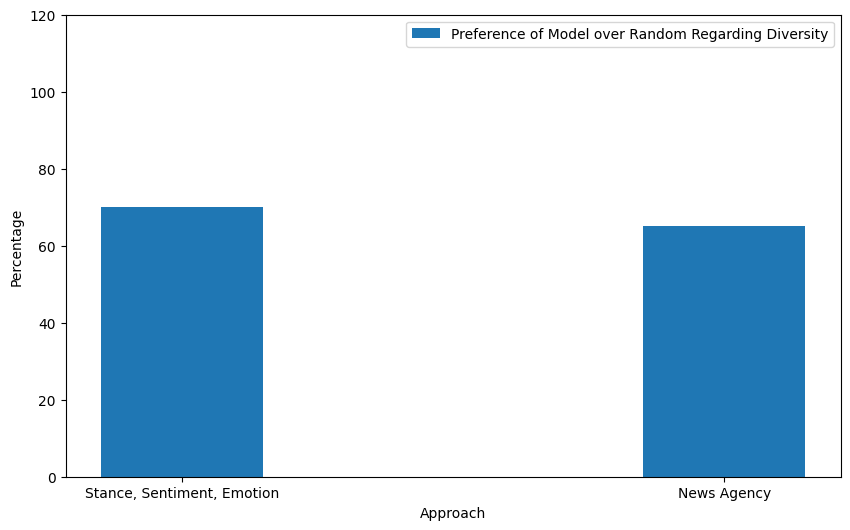

In [46]:
plt.figure(figsize=(10, 6))

plt.ylim(0, 120)

x = ["Stance, Sentiment, Emotion", "News Agency"]
x_axis = np.arange(len(x))
y_viewpoint = [model_approach_percentages["Stance, Sentiment, Emotion"], model_approach_percentages["News Agency"]]

plt.bar(x_axis, y_viewpoint, 0.3, label='Preference of Model over Random Regarding Diversity')

plt.xticks(x_axis, x)
plt.xlabel("Approach")
plt.ylabel('Percentage')

plt.legend()
plt.savefig('figures/preference_of_model_over_random_regarding_diversity_stance_etc_vs_news_agency.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

# Comparision short vs. long comments 

In [47]:
comment_answers

,Unnamed: 0,answer_id,participant_id,question_id,news_agency,keywords,comment_selection_id,comment_text,recommendation_method,comment_id,good_recommendation
0,0,1,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,"In your case yes, post partum. Like soon.",random,62,False
1,1,2,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,It died the minute Trump became the leader of ...,random,61,False
2,2,3,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",25,This decision is absolutely staggering in it's...,news-agency,75,True
3,3,4,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",25,The very opposite is true. Abortion is a moral...,news-agency,74,True
4,4,5,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,"Yes, it appears to be ""losing"" as more and mor...",random,63,True
...,...,...,...,...,...,...,...,...,...,...,...
481,481,482,4,1,NyTimes,"[United States Politics and Government, Trump ...",3,Anna North has it just right on the infinite l...,sentiment,7,True
482,482,483,4,1,NyTimes,"[United States Politics and Government, Trump ...",3,"Excellent article, well written and perceptive...",sentiment,9,False
483,483,484,4,2,NyTimes,"[Abortion, Birth Control and Family Planning, ...",7,If Medicare and Title X reimbursement were not...,stance,19,False
484,484,485,4,2,NyTimes,"[Abortion, Birth Control and Family Planning, ...",7,I suspect Trump has enabled a few abortions in...,stance,20,False


In [48]:
short_recommendations  = comment_answers[comment_answers['comment_text'].apply(lambda row: len(row) < 200)]
long_recommendations  = comment_answers[comment_answers['comment_text'].apply(lambda row: len(row) >= 200)]


In [49]:
short_recommendations

,Unnamed: 0,answer_id,participant_id,question_id,news_agency,keywords,comment_selection_id,comment_text,recommendation_method,comment_id,good_recommendation
0,0,1,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,"In your case yes, post partum. Like soon.",random,62,False
1,1,2,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,It died the minute Trump became the leader of ...,random,61,False
14,14,15,1,3,NyTimes,"[Greenhouse Gas Emissions, Global Warming, Agr...",11,"Ironically, many northern lands, where ghg are...",random,31,False
21,21,22,1,6,Breitbart,"[climate alarmism,Climate Change,Global Warmin...",30,That is extremely ignorant. Climate change and...,news-agency,88,False
22,22,23,1,6,Breitbart,"[climate alarmism,Climate Change,Global Warmin...",26,There fixed the headline for ya.,random,77,False
...,...,...,...,...,...,...,...,...,...,...,...
460,460,461,4,6,Breitbart,"[climate alarmism,Climate Change,Global Warmin...",26,There fixed the headline for ya.,random,77,False
461,461,462,4,6,Breitbart,"[climate alarmism,Climate Change,Global Warmin...",26,"Lancet at its best was always a kinda, sorta s...",random,78,False
463,463,464,4,6,Breitbart,"[climate alarmism,Climate Change,Global Warmin...",30,That is extremely ignorant. Climate change and...,news-agency,88,True
465,465,466,4,3,NyTimes,"[Greenhouse Gas Emissions, Global Warming, Agr...",11,"Ironically, many northern lands, where ghg are...",random,31,True


In [50]:
long_recommendations

,Unnamed: 0,answer_id,participant_id,question_id,news_agency,keywords,comment_selection_id,comment_text,recommendation_method,comment_id,good_recommendation
2,2,3,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",25,This decision is absolutely staggering in it's...,news-agency,75,True
3,3,4,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",25,The very opposite is true. Abortion is a moral...,news-agency,74,True
4,4,5,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",21,"Yes, it appears to be ""losing"" as more and mor...",random,63,True
5,5,6,1,5,Breitbart,"[Abortion,ACLU,Amendment,ballot initiatives,Ba...",25,Ah . . . so that case in Texas WASNT about the...,news-agency,73,True
6,6,7,1,2,NyTimes,"[Abortion, Birth Control and Family Planning, ...",9,Support for abortion in the US is decreasing b...,emotion,26,True
...,...,...,...,...,...,...,...,...,...,...,...
481,481,482,4,1,NyTimes,"[United States Politics and Government, Trump ...",3,Anna North has it just right on the infinite l...,sentiment,7,True
482,482,483,4,1,NyTimes,"[United States Politics and Government, Trump ...",3,"Excellent article, well written and perceptive...",sentiment,9,False
483,483,484,4,2,NyTimes,"[Abortion, Birth Control and Family Planning, ...",7,If Medicare and Title X reimbursement were not...,stance,19,False
484,484,485,4,2,NyTimes,"[Abortion, Birth Control and Family Planning, ...",7,I suspect Trump has enabled a few abortions in...,stance,20,False


In [51]:
print(f"Check that length of short recommendations + long recommendations is equal to length of comment_answers: {len(comment_answers) == (len(short_recommendations) + len(long_recommendations))}") 

Check that length of short recommendations + long recommendations is equal to length of comment_answers: True


## Good Recommendation for Short Comment

In [52]:
good_recommendation_short_comments_model = round(len(comment_answers[
                         (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) &
                         (comment_answers['comment_text'].apply(lambda row: len(row) < 200))].index) /   len(comment_answers[ 
                                                                                                                       (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) &
                                                                                                             comment_answers['comment_text'].apply(lambda row: len(row) < 200)].index), 2) * 100
good_recommendation_short_comments_random = round(len(comment_answers[
                         (~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) &
                         (comment_answers['comment_text'].apply(lambda row: len(row) < 200))].index) /   len(comment_answers[ 
                                                                                                                       (~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) &
                                                                                                             comment_answers['comment_text'].apply(lambda row: len(row) < 200)].index), 2) * 100

print(f"{good_recommendation_short_comments_model}% of the short recommendations by the model are perceived as a good recommendation")
print(f"{good_recommendation_short_comments_random}% of the short recommendations by random are perceived as a good recommendation")

59.0% of the short recommendations by the model are perceived as a good recommendation
13.0% of the short recommendations by random are perceived as a good recommendation


## Good Recommendation for Long Comment for Model

In [53]:
good_recommendation_long_comments_model = round(len(comment_answers[
                         (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) &
                         (comment_answers['comment_text'].apply(lambda row: len(row) >= 200))].index) /   len(comment_answers[ 
                                                                                                                       (comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) &
                                                                                                             comment_answers['comment_text'].apply(lambda row: len(row) >= 200)].index), 2) * 100


good_recommendation_long_comments_random = round(len(comment_answers[
                         (~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) & 
                         (comment_answers['good_recommendation']) &
                         (comment_answers['comment_text'].apply(lambda row: len(row) >= 200))].index) /   len(comment_answers[ 
                                                                                                                       ( ~comment_answers['recommendation_method'].isin(['stance', 'sentiment', 'emotion', 'news-agency'])) &
                                                                                                             comment_answers['comment_text'].apply(lambda row: len(row) >= 200)].index), 2) * 100

print(f"{good_recommendation_long_comments_model}% of the long recommendations by the model are perceived as a good recommendation")
print(f"{good_recommendation_long_comments_random}% of the long recommendations by random are perceived as a good recommendation")

72.0% of the long recommendations by the model are perceived as a good recommendation
62.0% of the long recommendations by random are perceived as a good recommendation


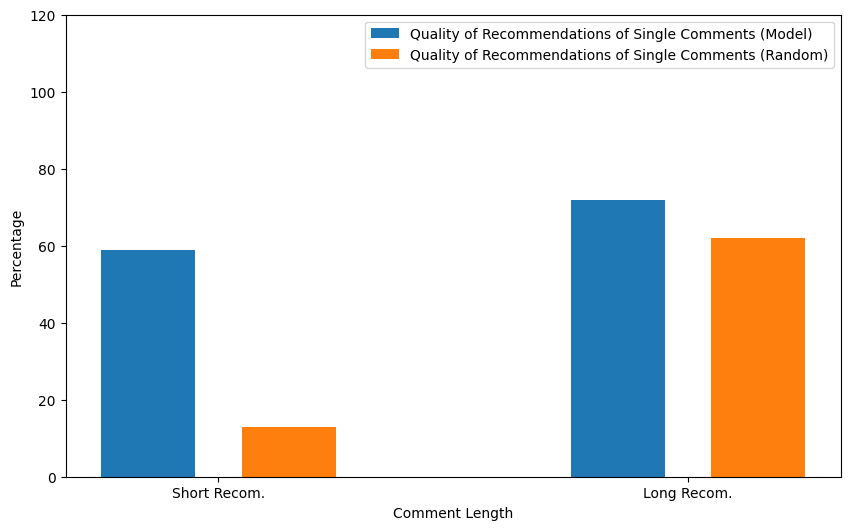

In [54]:
plt.figure(figsize=(10, 6))

plt.ylim(0, 120)

x = ["Short Recom.", "Long Recom."]
x_axis = np.arange(len(x))
y_random = [good_recommendation_short_comments_random, good_recommendation_long_comments_random]
y_model = [good_recommendation_short_comments_model, good_recommendation_long_comments_model]

plt.bar(x_axis - 0.15, y_model, 0.2, label='Quality of Recommendations of Single Comments (Model)')
plt.bar(x_axis + 0.15, y_random, 0.2, label='Quality of Recommendations of Single Comments (Random)')


plt.xticks(x_axis, x)
plt.xlabel("Comment Length")
plt.ylabel('Percentage')

plt.legend()
plt.savefig('figures/quality_of_recommendations_per_comment_length.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

# Demographics

In [55]:
participants = participants[~participants['participant_id'].isin(participant_ids_not_finished)]

## Age Distribution

In [56]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf]

# Label the bins
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Apply pd.cut() to create age groups
participants['age_group'] = pd.cut(participants['age'], bins=bins, labels=labels, right=False)

print(participants[['age', 'age_group']].head())

# Example usage: Group by age_group and count
participants['age_group'].value_counts(sort=False)

   age age_group
0   31     30-39
1   30     30-39
2   53     50-59
5   28     20-29
6   32     30-39


age_group
0-9      0
10-19    0
20-29    1
30-39    7
40-49    0
50-59    1
60-69    0
70-79    0
80-89    0
90+      0
Name: count, dtype: int64

In [57]:
participants.groupby("education").count()

,Unnamed: 0,participant_id,gender,age,age_group
education,,,,,
master,4,4,3,4,4
phd,5,5,5,5,5


In [58]:
participants.groupby("gender").count()

,Unnamed: 0,participant_id,age,education,age_group
gender,,,,,
female,2,2,2,2,2
male,6,6,6,6,6
